In [1]:
import pandas as pd
import numpy as np
import snsynth as sn
import seaborn as sns
from snsynth.mst import MSTSynthesizer
import matplotlib.pyplot as plt

/home/ensai/.local/lib/python3.10/site-packages/mbi/__init__.py:15: UserWarning: MixtureInference disabled, please install jax and jaxlib
  warnings.warn('MixtureInference disabled, please install jax and jaxlib')


In [2]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
         'marital-status', 'occupation', 'relationship', 'race',
         'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'income']

adult = pd.read_csv('adult.data', sep=',\s+', header=None, names=names, na_values='?', engine='python', skipinitialspace=True)

adult.dropna(inplace=True)

adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# synth_1 = sn.Synthesizer.create('mst', epsilon=1.0, verbose=True)
synth_1 = MSTSynthesizer(epsilon=1.0,
                         delta=1e-5)
categorical_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
continuous_col = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
synth_1.fit(adult, categorical_columns=categorical_col, continuous_columns=continuous_col, preprocessor_eps=0.5)

Spent 0.49999999999999994 epsilon on preprocessor, leaving 0.5 for training


In [6]:
# synth_100 = sn.Synthesizer.create('mst', epsilon=100, delta=1e-05, verbose=True)
synth_100 = MSTSynthesizer(epsilon=100.0,
                           delta=1e-5)
categorical_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
continuous_col = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
synth_100.fit(adult, categorical_columns=categorical_col, continuous_columns=continuous_col, preprocessor_eps=5)

Spent 5.0 epsilon on preprocessor, leaving 95.0 for training


In [7]:
sn.Synthesizer().list_synthesizers()

['mwem', 'dpctgan', 'patectgan', 'mst', 'pacsynth', 'dpgan', 'pategan', 'aim']

In [8]:
synth_1.sample(100)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,44.0,State-gov,377651.2,HS-grad,9.5,Divorced,Adm-clerical,Not-in-family,White,Male,819.2,102.4,38.0,United-States,<=50K
1,32.8,Private,377651.2,HS-grad,9.5,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,819.2,102.4,50.0,Ireland,<=50K
2,32.8,State-gov,171212.8,Masters,15.5,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,819.2,102.4,50.0,United-States,>50K
3,32.8,Private,274432.0,Assoc-voc,12.5,Married-spouse-absent,Exec-managerial,Own-child,White,Male,819.2,102.4,50.0,United-States,<=50K
4,55.2,Private,274432.0,HS-grad,9.5,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,819.2,102.4,38.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,66.4,Self-emp-not-inc,171212.8,Bachelors,12.5,Married-civ-spouse,Protective-serv,Husband,White,Male,819.2,102.4,38.0,United-States,>50K
96,32.8,Private,274432.0,Assoc-acdm,12.5,Divorced,Exec-managerial,Not-in-family,White,Male,819.2,102.4,14.0,United-States,<=50K
97,55.2,Private,171212.8,Prof-school,15.5,Never-married,Adm-clerical,Not-in-family,White,Female,819.2,102.4,38.0,United-States,<=50K
98,32.8,Private,171212.8,Assoc-voc,12.5,Married-civ-spouse,Adm-clerical,Wife,White,Female,819.2,102.4,62.0,United-States,<=50K


In [9]:
synth_100.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,44.0,Local-gov,67993.6,Assoc-voc,11.85,Never-married,Other-service,Not-in-family,White,Male,6553.6,204.8,46.1,United-States,<=50K
1,21.6,Private,171212.8,HS-grad,8.75,Never-married,Sales,Not-in-family,White,Male,6553.6,204.8,46.1,United-States,<=50K
2,32.8,Private,67993.6,7th-8th,2.55,Never-married,Machine-op-inspct,Other-relative,Other,Male,6553.6,204.8,46.1,United-States,<=50K
3,55.2,Private,171212.8,Bachelors,11.85,Married-civ-spouse,Exec-managerial,Husband,White,Male,6553.6,204.8,46.1,United-States,<=50K
4,55.2,Private,67993.6,10th,5.65,Separated,Handlers-cleaners,Not-in-family,White,Female,6553.6,204.8,46.1,United-States,<=50K
5,44.0,Private,171212.8,HS-grad,8.75,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6553.6,204.8,46.1,United-States,<=50K
6,21.6,State-gov,171212.8,Bachelors,11.85,Married-civ-spouse,Prof-specialty,Husband,White,Male,6553.6,204.8,46.1,United-States,>50K
7,32.8,Private,274432.0,HS-grad,8.75,Married-civ-spouse,Adm-clerical,Husband,Other,Male,6553.6,204.8,46.1,Jamaica,>50K
8,21.6,Private,274432.0,Assoc-voc,11.85,Never-married,Farming-fishing,Own-child,White,Male,6553.6,204.8,46.1,United-States,<=50K
9,44.0,Private,377651.2,HS-grad,8.75,Married-civ-spouse,Craft-repair,Husband,White,Male,6553.6,204.8,46.1,United-States,<=50K


In [7]:
marital_status_distribution = adult['hours-per-week'].value_counts()
print(marital_status_distribution)

hours-per-week
40    14251
50     2718
45     1753
60     1405
35     1184
      ...  
82        1
94        1
92        1
87        1
74        1
Name: count, Length: 94, dtype: int64


## Question: Do men and women work a different amount of hours per week ?

Real values:

In [10]:
mean_hours_per_week_by_gender = adult.groupby('gender')['hours-per-week'].mean()
print(mean_hours_per_week_by_gender)

gender
Female    36.932222
Male      42.850687
Name: hours-per-week, dtype: float64


Differentially-private values:

In [11]:
num_samples = 100
sampled_means = []

for _ in range(num_samples):
    sampled = synth_1.sample(10000)
    mean_hours = sampled.groupby('gender')['hours-per-week'].mean()
    sampled_means.append(mean_hours)

sampled_means_df = pd.DataFrame(sampled_means)

mean_hours_per_week_by_gender_sampled_1 = sampled_means_df.mean()
print(mean_hours_per_week_by_gender_sampled_1)

gender
Female    39.387393
Male      41.374104
dtype: float64


In [12]:
sampled_means_100 = []

for _ in range(num_samples):
    sampled_100 = synth_100.sample(10000)
    mean_hours = sampled_100.groupby('gender')['hours-per-week'].mean()
    sampled_means_100.append(mean_hours)

sampled_means_100_df = pd.DataFrame(sampled_means_100)

mean_hours_per_week_by_gender_sampled_100 = sampled_means_100_df.mean()
print(mean_hours_per_week_by_gender_sampled_100)

gender
Female    42.150554
Male      44.339179
dtype: float64


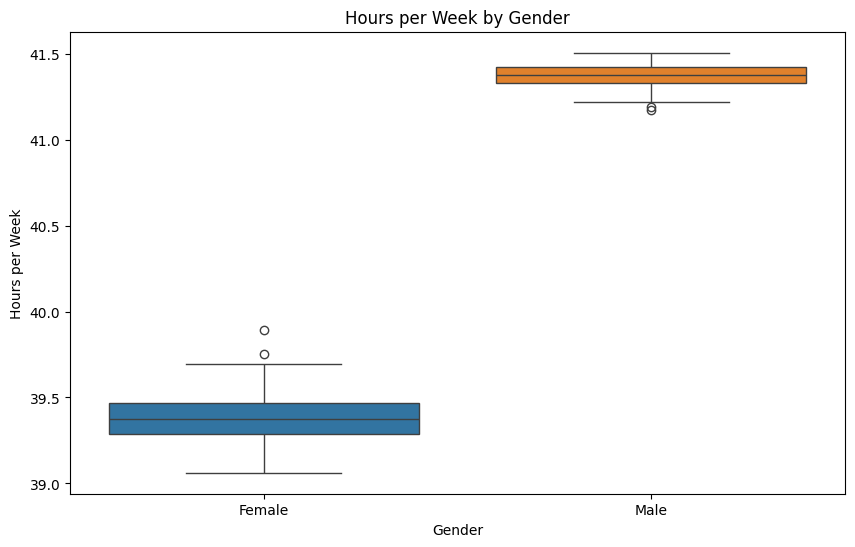

In [13]:
mean_std_df = sampled_means_df.agg(['mean', 'std'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=sampled_means_df)
plt.title('Hours per Week by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.savefig('e1_eps1.pdf')

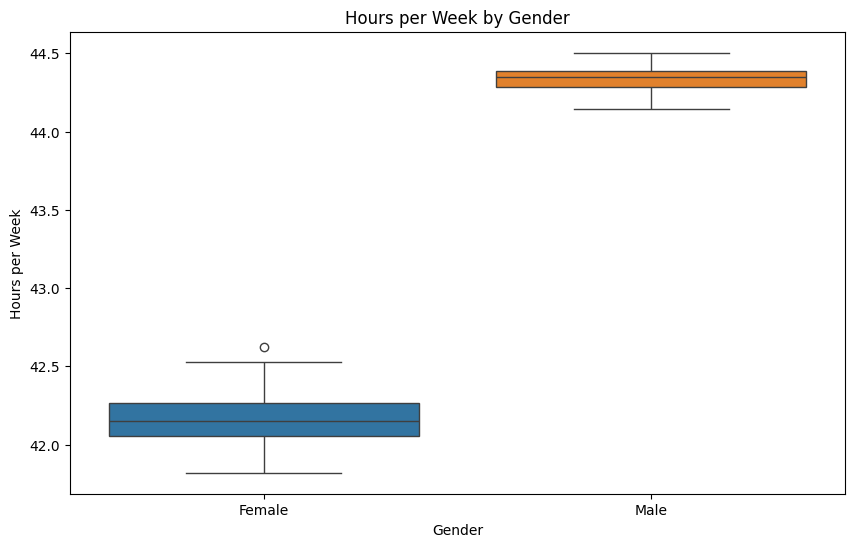

In [14]:
mean_std_df = sampled_means_100_df.agg(['mean', 'std'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=sampled_means_100_df)
plt.title('Hours per Week by Gender') 
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.savefig('e1_eps100.pdf')

In [15]:
def euclidean_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

x1, y1 = mean_hours_per_week_by_gender['Female'], mean_hours_per_week_by_gender['Male']
x2, y2 = mean_hours_per_week_by_gender_sampled_1['Female'], mean_hours_per_week_by_gender_sampled_1['Male']
x3, y3 = mean_hours_per_week_by_gender_sampled_100['Female'], mean_hours_per_week_by_gender_sampled_100['Male']

print("epsilon = 1 ", euclidean_distance(x1, x2, y1, y2))
print("epsilon = 100 ", euclidean_distance(x1, x3, y1, y3))

epsilon = 1  2.8649890293187776
epsilon = 100  5.426471522315407


## Implement Euclidean distance to compare results